In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable
import sys

def sign(num):
    check = Variable(torch.Tensor([0.0]).double().expand(num.size()))
    return torch.ge(num,check).double()


def accuracy(y_real, y_predicted):
    n = y_real.size()[0]
    y_signs = sign(y_predicted)
    return (y_signs.data==y_real.data).sum()/n

In [15]:
images = np.load('data/images.npy')
labels = np.load('data/labels.npy')
flattened_image = images.reshape([len(images),-1])
flattened_image = (flattened_image - flattened_image.mean())/(flattened_image.std())
flattened_image = np.insert(flattened_image, 0, 1, axis=1) #add bias

apple_labels = labels
learning_rate = 0.01

apple_labels[labels == 0] = 10 
apple_labels[labels < 10] = 0
apple_labels[labels == 10] = 1
n,m = flattened_image.shape
regu = 1

In [6]:
X = Variable(torch.from_numpy(flattened_image)).double()
y = Variable(torch.from_numpy(apple_labels).view(-1,1)).double()
X_test = X[-5000:]
y_test = y[-5000:]

In [16]:
train_accuracy = []
dev_accuracy = []

test_set_accuracy = []
epoch_points_train = []
epoch_points_dev = []
for super in range(1):
    w = np.zeros([1,m])
    w = Variable((torch.from_numpy(w)), requires_grad = True)

    for iterations in range(3):

        # shuffle first 45,000 so that after every epoch we don't overfit
        # random = torch.randperm(45000)
        # X_shuffled = X[random]
        # y_shuffled = y[random]

        X_shuffled = X[:45000]
        y_shuffled = y[:45000]


        X_train = X_shuffled[:40000]
        X_dev = X_shuffled[-5000:]

        y_train = y_shuffled[:40000]
        y_dev = y_shuffled[-5000:]

        n = X_train.size()[0]

        
        for i in range(n):
            hypo = torch.sigmoid(X_train[i].view(1,-1).mm(w.t()))
            eps1, eps2 = 1e-9,1e9
#             print(hypo)
            loss = (y_train[i] * (hypo.clamp(eps1, eps2).log())).sum() + \
                    ((1-y_train[i]) * ((1-hypo).clamp(eps1, eps2).log())).sum() + \
                    0.01 * w.t().mm(w).sum()
            
            loss.backward()
            w.data = w.data + 0.01 * w.grad.data
            
            if i%100 == 0:
                rand_train = torch.from_numpy(np.random.choice(40000, 1000, replace=False))
                # rand_dev = torch.from_numpy(np.random.choice(5000, 1000, replace=False))
                train_accuracy.append(accuracy(y_train[rand_train], X_train[rand_train].mm(w.t())))
                # dev_accuracy.append(accuracy(y_dev[rand_dev], X_dev[rand_dev].mm(w.t())))
                dev_accuracy.append(accuracy(y_dev, X_dev.mm(w.t())))
#                 print(i)

        test_set_accuracy.append(accuracy(y_test,X_test.mm(w.t())))
        epoch_points_train.append(train_accuracy[-1])
        epoch_points_dev.append(dev_accuracy[-1])
        
        print(epoch_points_train[-1], epoch_points_dev[-1], test_set_accuracy[-1])

0.807 0.7978 0.8008
0.794 0.7978 0.8008


KeyboardInterrupt: 

In [8]:
w.t().mm(w).sum()

Variable containing:
nan
[torch.DoubleTensor of size 1]

In [9]:
train_accuracy = []
dev_accuracy = []

test_set_accuracy = []
epoch_points_train = []
epoch_points_dev = []
for super in range(1):
    w = np.zeros([1,m])
    w = Variable((torch.from_numpy(w)), requires_grad = True)

    for iterations in range(3):

        # shuffle first 45,000 so that after every epoch we don't overfit
        # random = torch.randperm(45000)
        # X_shuffled = X[random]
        # y_shuffled = y[random]

        X_shuffled = X[:45000]
        y_shuffled = y[:45000]


        X_train = X_shuffled[:40000]
        X_dev = X_shuffled[-5000:]

        y_train = y_shuffled[:40000]
        y_dev = y_shuffled[-5000:]

        n = X_train.size()[0]

        
        for i in range(n):
            hypo = torch.sigmoid(X_train[i].view(1,-1).mm(w.t()))
            eps1, eps2 = 1e-9,1e9
#             print(hypo)
            loss = (y_train[i] * (hypo.clamp(eps1, eps2).log())).sum() + \
                    ((1-y_train[i]) * ((1-hypo).clamp(eps1, eps2).log())).sum()   + \
                    0.4 * w.sum()

            loss.backward()
            w.data = w.data + 1e-7 * w.grad.data
            
            if i%100 == 0:
                rand_train = torch.from_numpy(np.random.choice(40000, 1000, replace=False))
                # rand_dev = torch.from_numpy(np.random.choice(5000, 1000, replace=False))
                train_accuracy.append(accuracy(y_train[rand_train], X_train[rand_train].mm(w.t())))
                # dev_accuracy.append(accuracy(y_dev[rand_dev], X_dev[rand_dev].mm(w.t())))
                dev_accuracy.append(accuracy(y_dev, X_dev.mm(w.t())))
#                 print(i)

        test_set_accuracy.append(accuracy(y_test,X_test.mm(w.t())))
        epoch_points_train.append(train_accuracy[-1])
        epoch_points_dev.append(dev_accuracy[-1])
        
        print(epoch_points_train[-1], epoch_points_dev[-1], test_set_accuracy[-1])
        
#0.794 0.7992 0.8006
# 0.801 0.799 0.8006
# 0.796 0.799 0.8006

#0.5 0.4716 0.4716
# 0.441 0.4332 0.4344
# 0.41 0.4146 0.4154

# 0.412 0.388 0.3814
# 0.394 0.385 0.3782
# 0.38 0.3832 0.3774

# 0.397 0.3816 0.3744
# 0.383 0.3816 0.3744
# 0.364 0.3816 0.3744

# 0.378 0.4028 0.3962
# 0.384 0.3912 0.385
# 0.373 0.3888 0.381

0.417 0.427 0.427
0.396 0.405 0.4034
0.422 0.3978 0.394


1200
0.394
0
0.6736


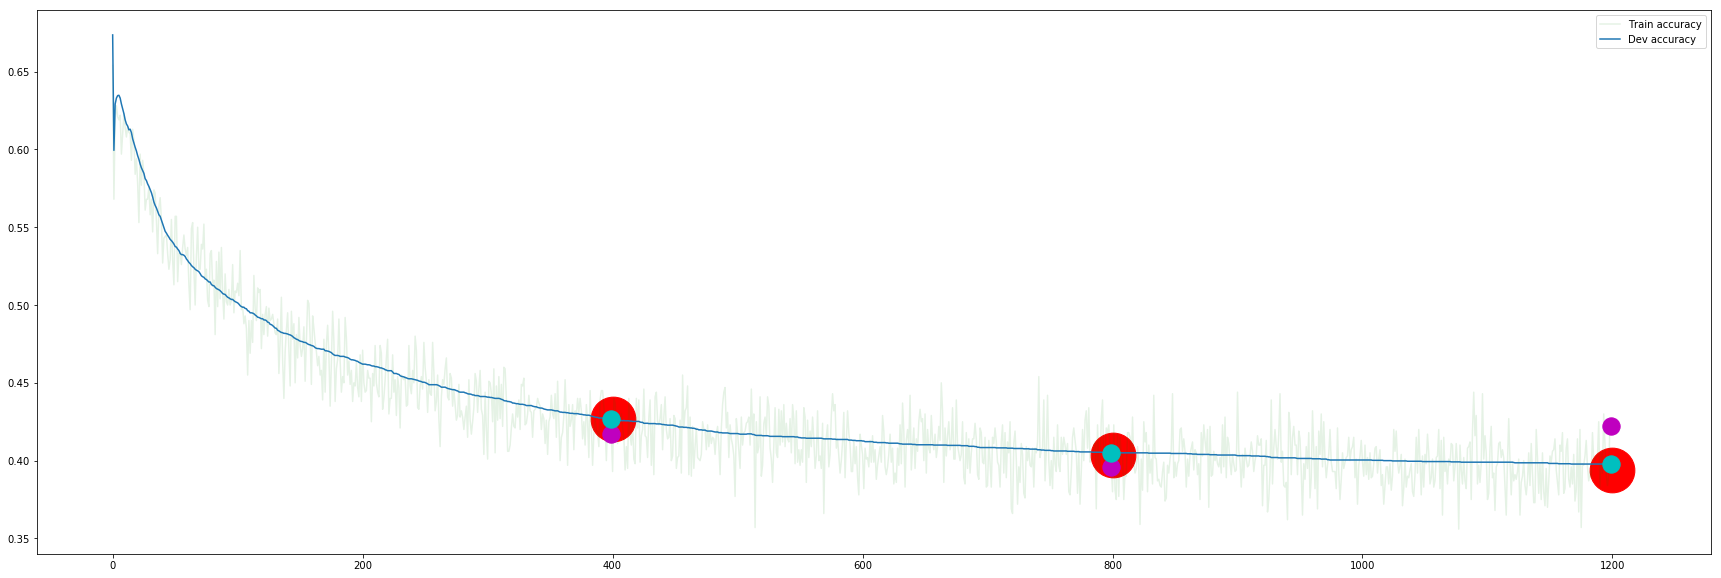

In [10]:
# 0.962 0.9522 0.9556
# 0.968 0.9668 0.9636
# 0.964 0.9602 0.9628
# 0.962 0.9634 0.9658
# 0.964 0.9666 0.9672
# 0.968 0.9664 0.969
# 0.965 0.9692 0.9692
# 0.972 0.9672 0.9708
# 0.975 0.9692 0.9696
# 0.974 0.9648 0.9692

#learning rate 0.000000001 + random
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

In [17]:
train_accuracy = []
dev_accuracy = []

test_set_accuracy = []
epoch_points_train = []
epoch_points_dev = []
for super in range(1):
    w = np.zeros([1,m])
    w = Variable((torch.from_numpy(w)), requires_grad = True)

    for iterations in range(10):

        # shuffle first 45,000 so that after every epoch we don't overfit
        random = torch.randperm(45000)
        X_shuffled = X[random]
        y_shuffled = y[random]

#         X_shuffled = X[:45000]
#         y_shuffled = y[:45000]


        X_train = X_shuffled[:40000]
        X_dev = X_shuffled[-5000:]

        y_train = y_shuffled[:40000]
        y_dev = y_shuffled[-5000:]

        n = X_train.size()[0]

        
        for i in range(n):
            hypo = torch.sigmoid(X_train[i].view(1,-1).mm(w.t()))
            eps1, eps2 = 1e-9,1e9
#             print(hypo)
            loss = (y_train[i] * (hypo.clamp(eps1, eps2).log())).sum() + \
                    ((1-y_train[i]) * ((1-hypo).clamp(eps1, eps2).log())).sum()            
            loss.backward()
            w.data = w.data + 0.01 * w.grad.data
            
            if i%100 == 0:
                rand_train = torch.from_numpy(np.random.choice(40000, 1000, replace=False))
                # rand_dev = torch.from_numpy(np.random.choice(5000, 1000, replace=False))
                train_accuracy.append(accuracy(y_train[rand_train], X_train[rand_train].mm(w.t())))
                # dev_accuracy.append(accuracy(y_dev[rand_dev], X_dev[rand_dev].mm(w.t())))
                dev_accuracy.append(accuracy(y_dev, X_dev.mm(w.t())))
#                 print(i)

        test_set_accuracy.append(accuracy(y_test,X_test.mm(w.t())))
        epoch_points_train.append(train_accuracy[-1])
        epoch_points_dev.append(dev_accuracy[-1])
        
        print(epoch_points_train[-1], epoch_points_dev[-1], test_set_accuracy[-1])

0.901 0.921 0.9192
0.916 0.9124 0.9164
0.908 0.9076 0.9144
0.92 0.904 0.9116
0.895 0.9092 0.9102
0.904 0.9076 0.9086
0.916 0.9046 0.909
0.916 0.9084 0.9062
0.913 0.9086 0.9048
0.891 0.91 0.9026


4000
0.9718
1363
0.9764


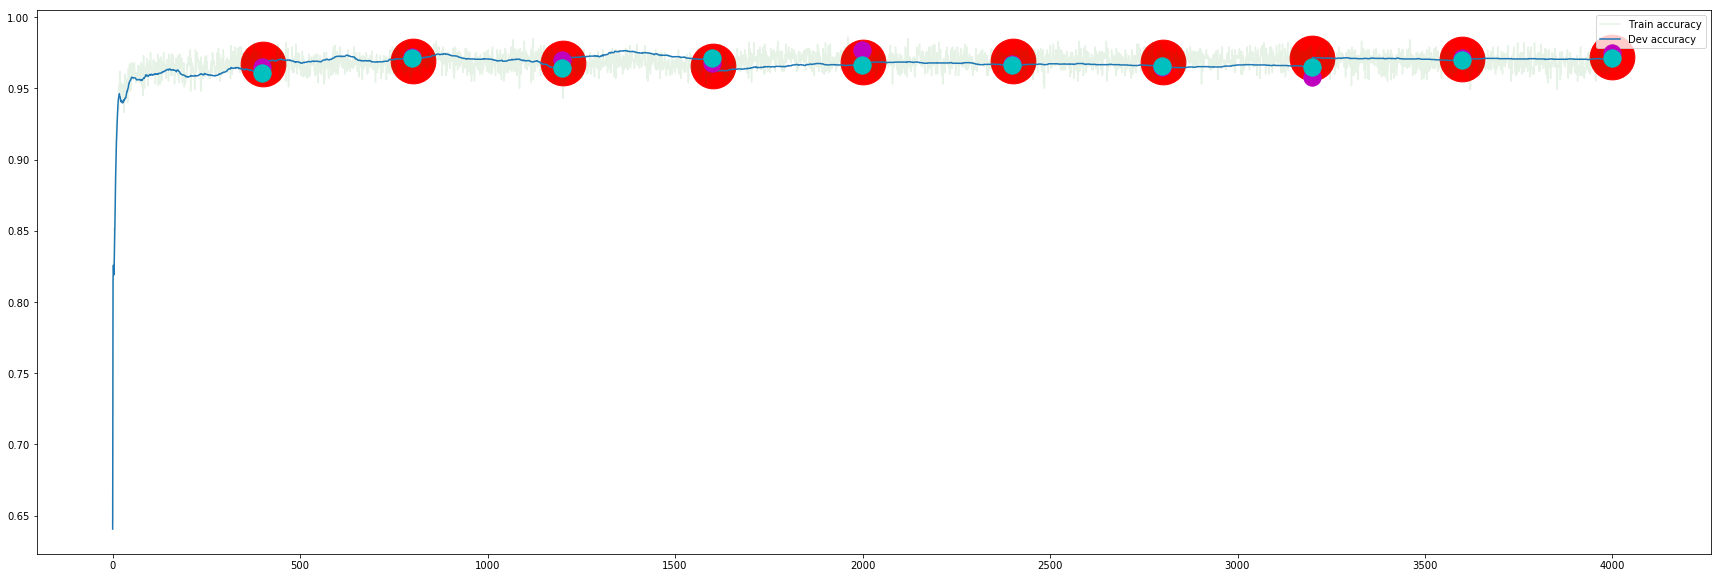

In [12]:
# 0.962 0.9522 0.9556
# 0.968 0.9668 0.9636
# 0.964 0.9602 0.9628
# 0.962 0.9634 0.9658
# 0.964 0.9666 0.9672
# 0.968 0.9664 0.969
# 0.965 0.9692 0.9692
# 0.972 0.9672 0.9708
# 0.975 0.9692 0.9696
# 0.974 0.9648 0.9692

#learning rate 0.000000001 + random
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

4000
0.9718
1363
0.9764


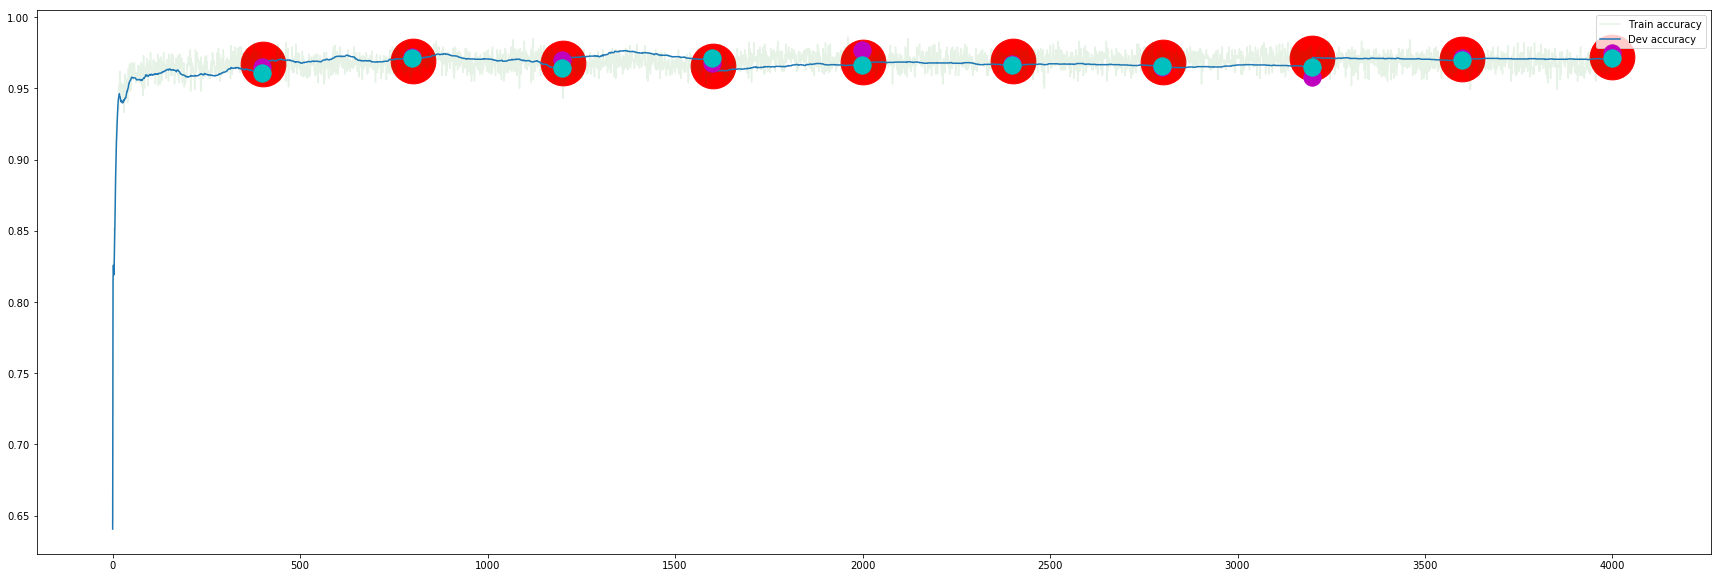

In [13]:
# 0.962 0.9522 0.9556
# 0.968 0.9668 0.9636
# 0.964 0.9602 0.9628
# 0.962 0.9634 0.9658
# 0.964 0.9666 0.9672
# 0.968 0.9664 0.969
# 0.965 0.9692 0.9692
# 0.972 0.9672 0.9708
# 0.975 0.9692 0.9696
# 0.974 0.9648 0.9692

#learning rate 0.00001 + random
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

4000
0.9692
508
0.97


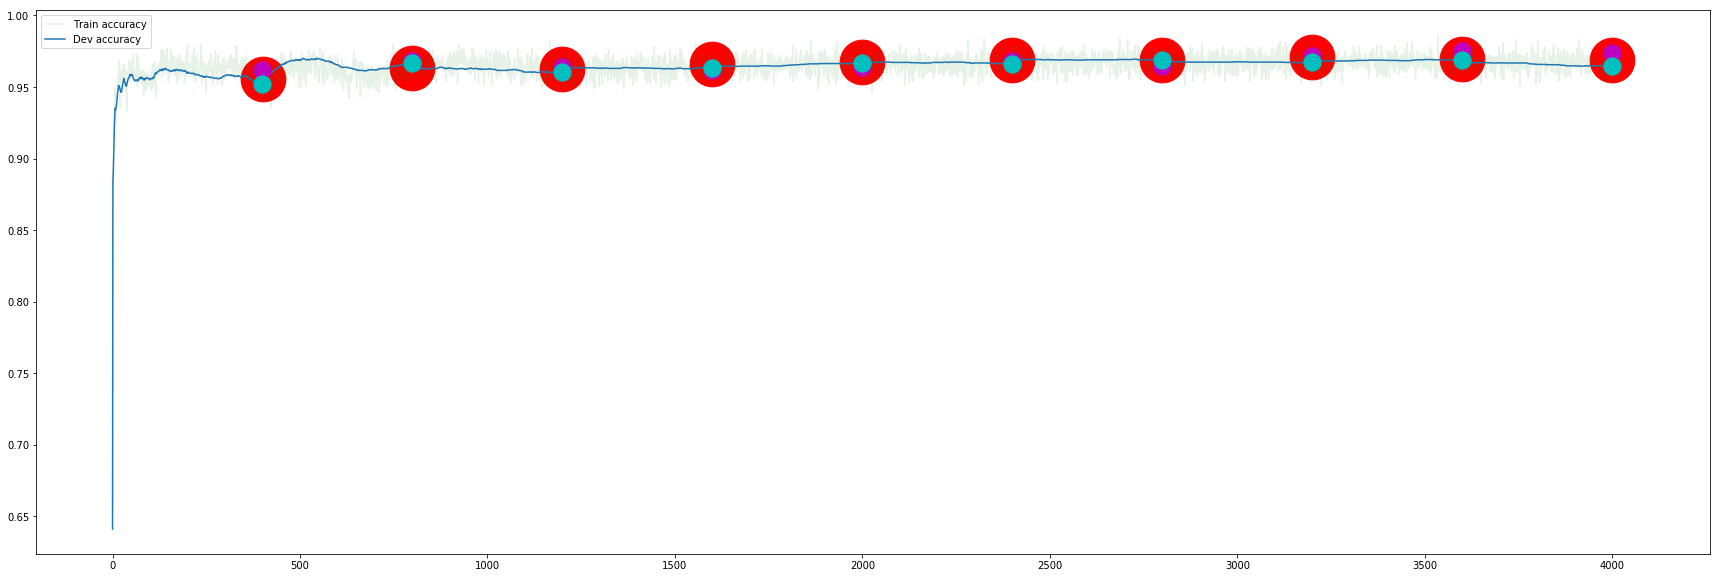

In [125]:
# 0.962 0.9522 0.9556
# 0.968 0.9668 0.9636
# 0.964 0.9602 0.9628
# 0.962 0.9634 0.9658
# 0.964 0.9666 0.9672
# 0.968 0.9664 0.969
# 0.965 0.9692 0.9692
# 0.972 0.9672 0.9708
# 0.975 0.9692 0.9696
# 0.974 0.9648 0.9692

#learning rate 0.00001 + random
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

4000
0.9678
3169
0.9696


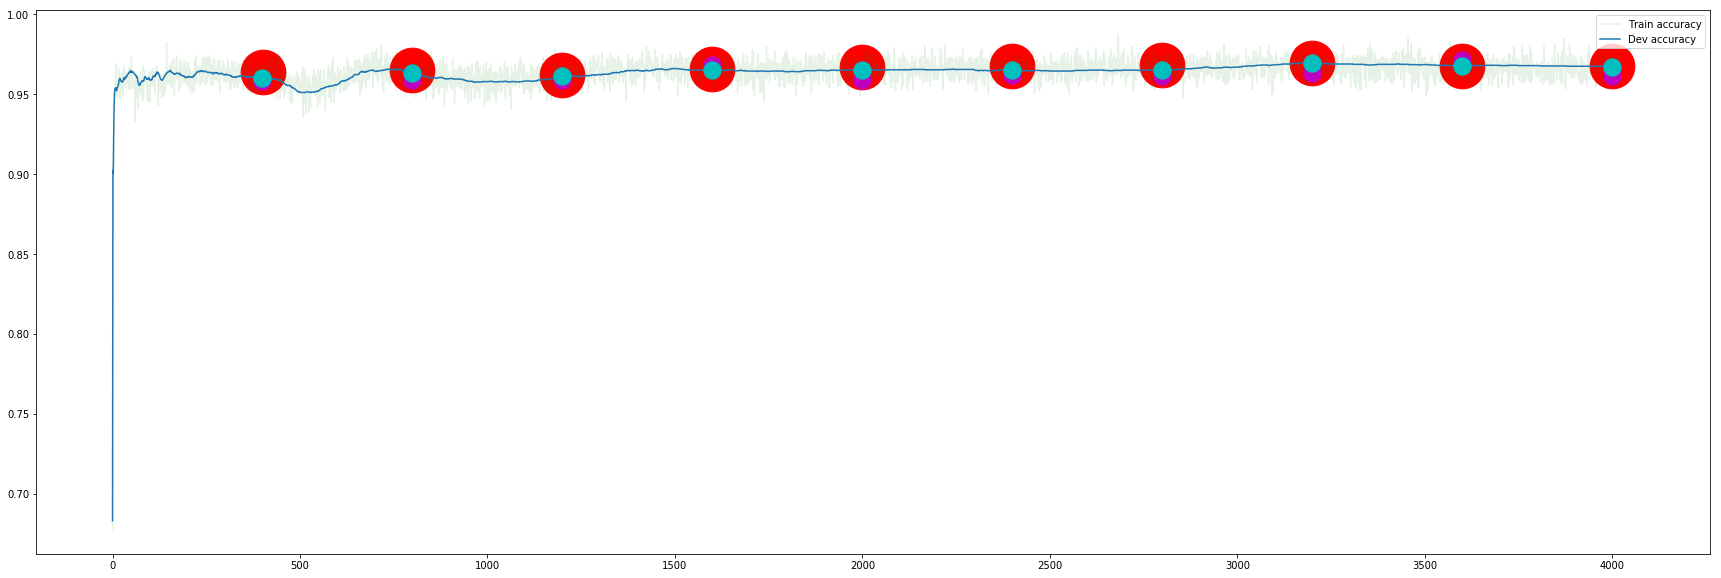

In [123]:

# 0.958 0.9598 0.9636
# 0.959 0.9632 0.9648
# 0.959 0.9612 0.9618
# 0.968 0.965 0.9658
# 0.959 0.9648 0.967
# 0.962 0.9652 0.9676
# 0.961 0.965 0.9684
# 0.963 0.9694 0.9692
# 0.971 0.9678 0.9678
# 0.961 0.9672 0.9678

#learning rate 0.00001
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

4000
0.955
252
0.9624


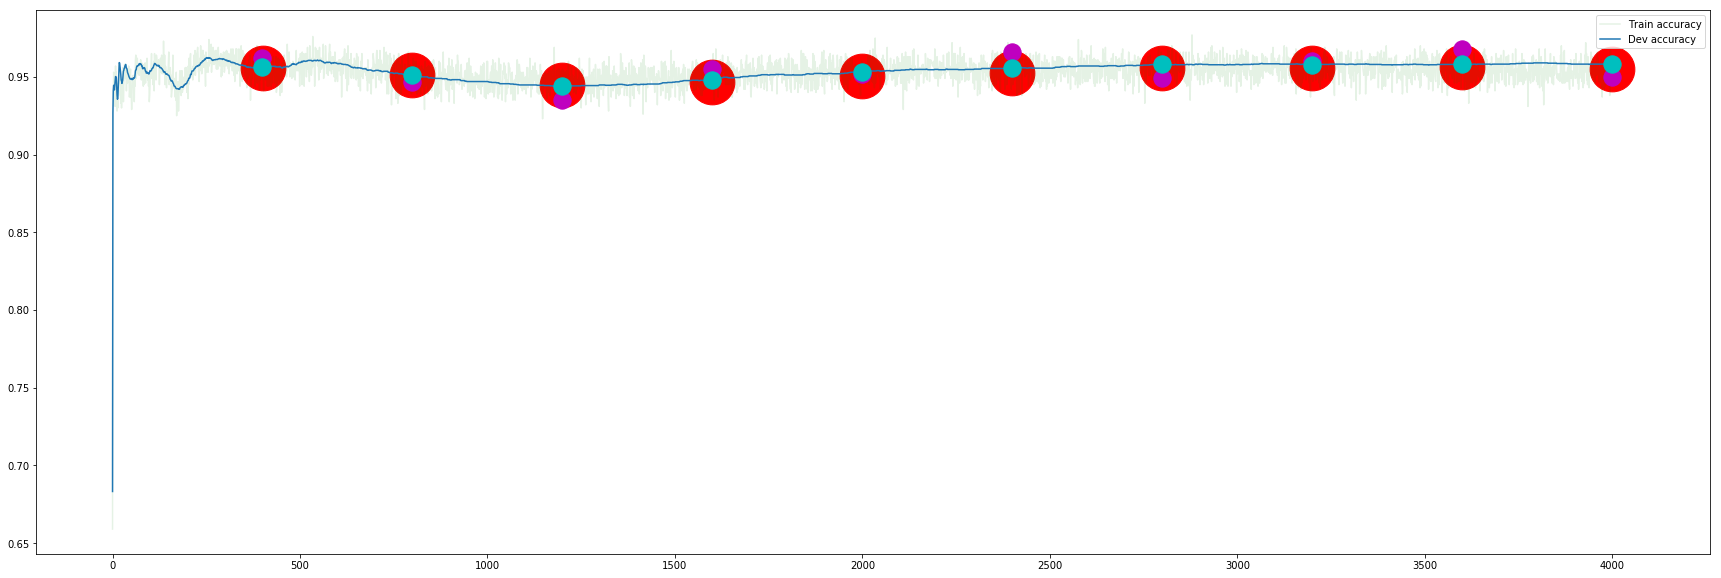

In [121]:
#learning rate 0.0001
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

In [ ]:
print(w)

4000
0.9478
754
0.9518


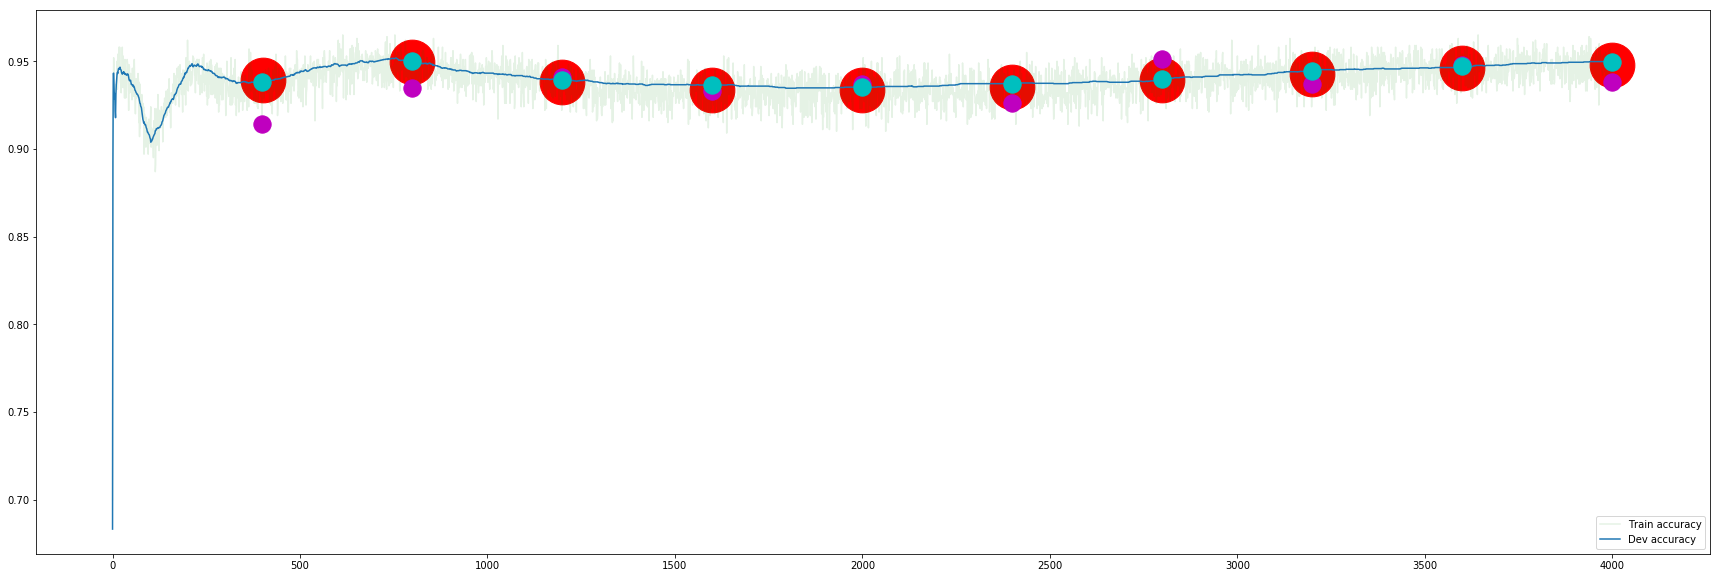

In [117]:
#learning rate 0.001
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

1200
0.9212
639
0.9254


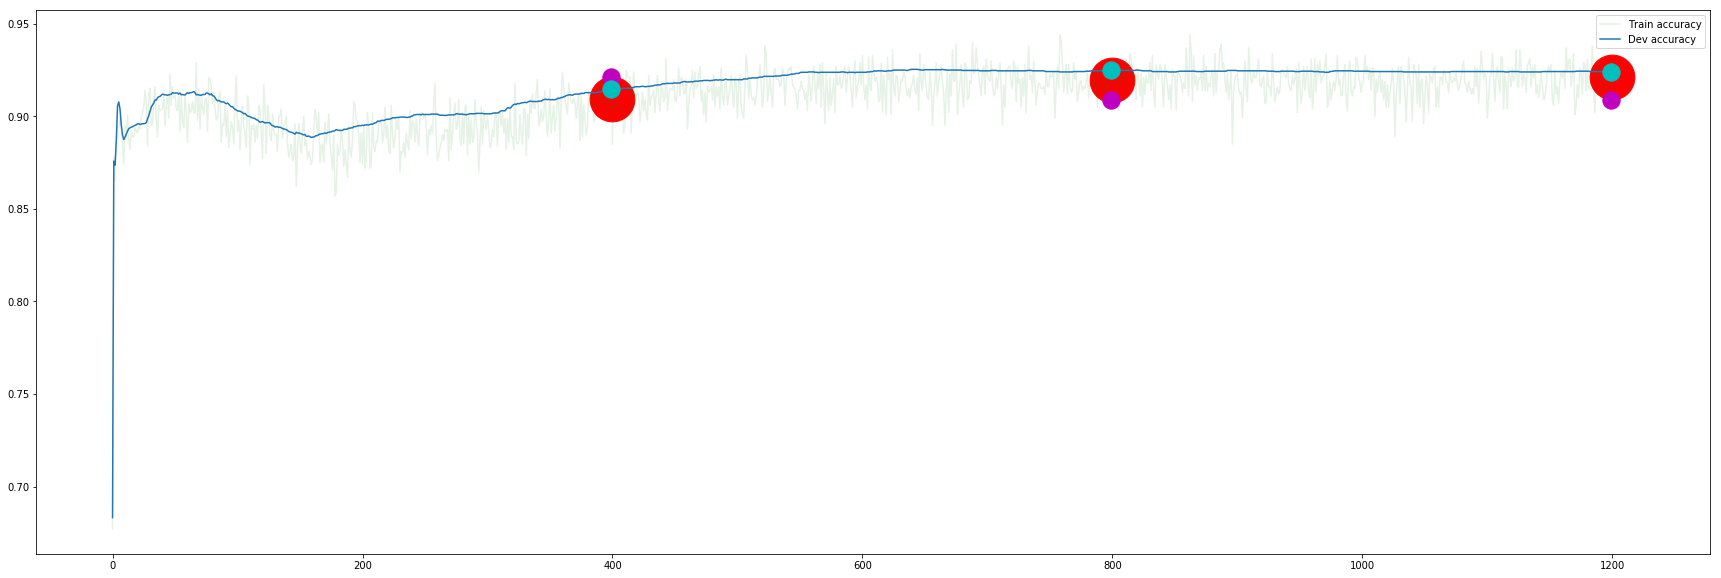

In [114]:
#learning rate 0.01
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

1200
0.8656
1009
0.8718


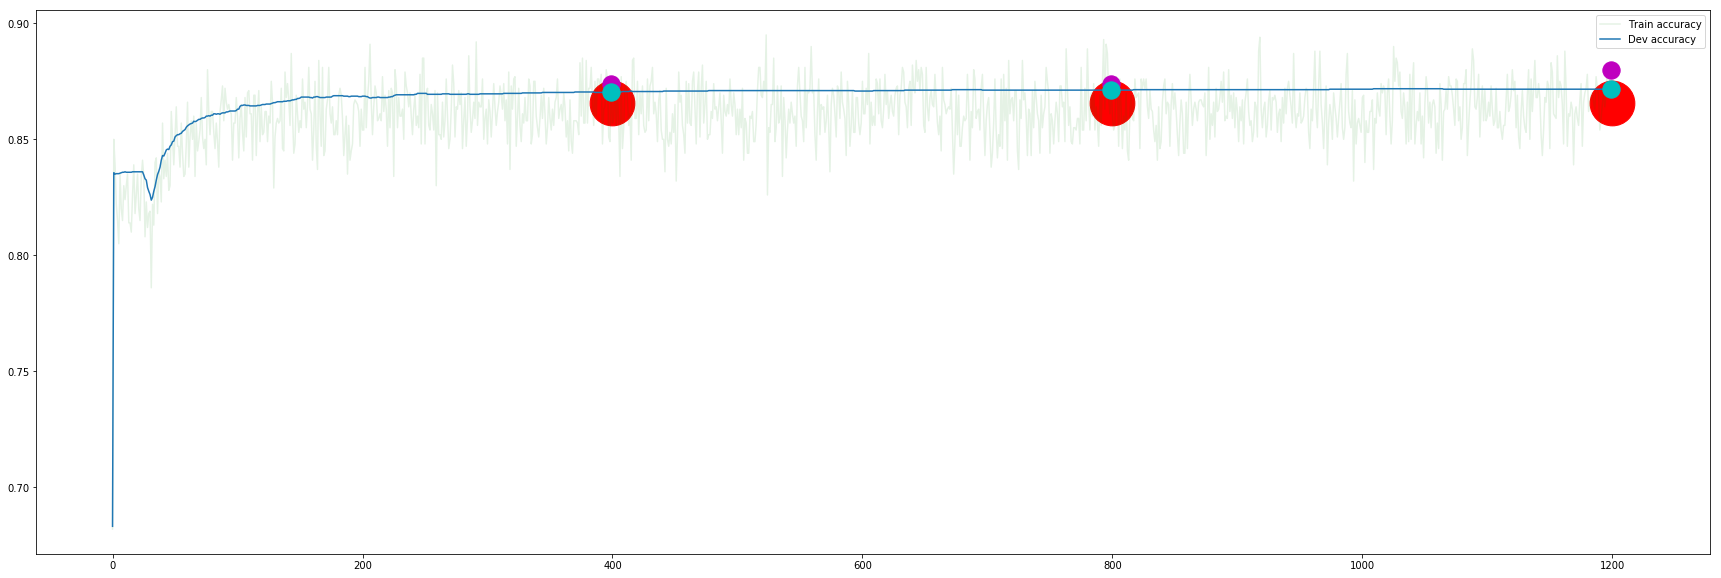

In [112]:
#learning rate 0.1
print(len(train_accuracy))
plt.figure(figsize=(30, 10))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='green',alpha=0.1)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy")

plt.legend(handles=[plt1, plt2])

print(accuracy(y_test,X_test.mm(w.t())))
for i,val in enumerate(test_set_accuracy):
    plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    plt.scatter(z, train_accuracy[z], c='m',s=300,zorder=10)
    plt.scatter(z, dev_accuracy[z], c='c',s=300,zorder=10)
    
print(np.argmax(dev_accuracy))
print(np.max(dev_accuracy))

In [ ]:
def test(learning_rate)
train_accuracy = []
dev_accuracy = []

test_set_accuracy = []
epoch_points_train = []for super in range(1):

epoch_points_dev = []

for super in range(1):
    w = np.zeros([1,m])
    w = Variable((torch.from_numpy(w)), requires_grad = True)

    for iterations in range(10):

        # shuffle first 45,000 so that after every epoch we don't overfit
#         random = torch.randperm(45000)
#         X_shuffled = X[random]
#         y_shuffled = y[random]

        X_shuffled = X[:45000]
        y_shuffled = y[:45000]


        X_train = X_shuffled[:40000]
        X_dev = X_shuffled[-5000:]

        y_train = y_shuffled[:40000]
        y_dev = y_shuffled[-5000:]

        n = X_train.size()[0]

        
        for i in range(n):
            hypo = torch.sigmoid(X_train[i].view(1,-1).mm(w.t()))
            eps1, eps2 = 1e-9,1e9
#             print(hypo)
            loss = (y_train[i] * (hypo.clamp(eps1, eps2).log())).sum() + \
                    ((1-y_train[i]) * ((1-hypo).clamp(eps1, eps2).log())).sum()            
            loss.backward()
            w.data = w.data + 0.000000001 * w.grad.data
            
            if i%100 == 0:
                rand_train = torch.from_numpy(np.random.choice(40000, 1000, replace=False))
                # rand_dev = torch.from_numpy(np.random.choice(5000, 1000, replace=False))
                train_accuracy.append(accuracy(y_train[rand_train], X_train[rand_train].mm(w.t())))
                # dev_accuracy.append(accuracy(y_dev[rand_dev], X_dev[rand_dev].mm(w.t())))
                dev_accuracy.append(accuracy(y_dev, X_dev.mm(w.t())))
#                 print(i)

        test_set_accuracy.append(accuracy(y_test,X_test.mm(w.t())))
        epoch_points_train.append(train_accuracy[-1])
        epoch_points_dev.append(dev_accuracy[-1])
        
        print(epoch_points_train[-1], epoch_points_dev[-1], test_set_accuracy[-1])